# Algoritmo de Newton

### Función de prueba

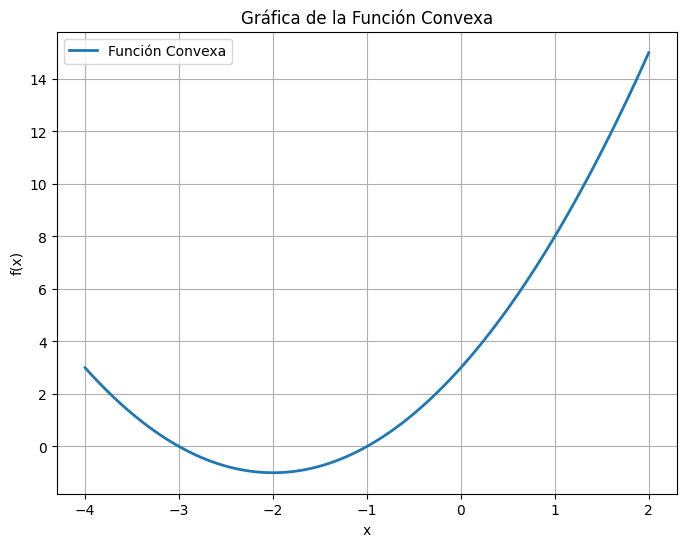

La función f(x) = x² + 4x + 3 tiene:
- Primera derivada: f'(x) = 2x + 4
- Segunda derivada: f''(x) = 2


In [42]:
import numpy as np
import matplotlib.pyplot as plt

def quasiconvex_function(x):
  return x**2 + 4*x + 3

# Graficar función
# Generar valores de x
x_values = np.linspace(-4, 2, 100)

# Calcular los valores correspondientes de y utilizando la función quasiconvex_function
y_values = [quasiconvex_function(x) for x in x_values]

# Graficar la función
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Función Convexa', linewidth=2)
plt.title('Gráfica de la Función Convexa')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

print(f"La función f(x) = x² + 4x + 3 tiene:")
print(f"- Primera derivada: f'(x) = 2x + 4")
print(f"- Segunda derivada: f''(x) = 2")

### Desarrollo del algoritmo

In [43]:
def derivada(func, x, h=1e-8):
  """Calcula la derivada numérica de una función"""
  return (func(x + h) - func(x - h)) / (2 * h)

def segunda_derivada(func, x, h=1e-8):
  """Calcula la segunda derivada numérica de una función"""
  return (func(x + h) - 2*func(x) + func(x - h)) / (h**2)

def newton_optimization(funcion_B, derivada_B, segunda_derivada_B, punto_inicial, tolerancia=1e-6, max_iteraciones=100):
  """
  Implementación del método de Newton para optimización
  """
  # 1. INICIALIZACIÓN
  d_actual = punto_inicial
  iteracion = 0
  
  # Imprimir encabezado para seguir el proceso
  print("Iteración | d_k       | B'(d_k)     | B''(d_k)")
  print("-----------------------------------------------")
  
  # 2. BUCLE PRINCIPAL
  while iteracion < max_iteraciones:
    # Calcular la primera y segunda derivada en el punto actual
    gradiente = derivada_B(d_actual)
    hessiano = segunda_derivada_B(d_actual)
    
    # Imprimir el estado de la iteración actual
    print(f"{iteracion:9} | {d_actual:9.6f} | {gradiente:11.6f} | {hessiano:9.6f}")
    
    # 3. VERIFICACIÓN DE LA SEGUNDA DERIVADA (HESSIANO)
    if abs(hessiano) < 1e-12:
      print("ERROR: La segunda derivada es cero o muy cercana a cero. El método falla.")
      return d_actual
    
    # 4. CÁLCULO DEL SIGUIENTE PUNTO (PASO DE NEWTON)
    d_siguiente = d_actual - gradiente / hessiano
    
    # 5. CRITERIOS DE CONVERGENCIA (CONDICIONES DE PARADA)
    # Condición 1: El gradiente en el punto actual es casi cero
    if abs(gradiente) < tolerancia:
      print("Convergencia alcanzada: el gradiente es menor que la tolerancia.")
      return d_actual
    
    # Condición 2: El cambio entre puntos es insignificante
    if abs(d_siguiente - d_actual) < tolerancia:
      print("Convergencia alcanzada: el cambio en 'd' es menor que la tolerancia.")
      return d_siguiente
    
    # 6. ACTUALIZACIÓN PARA LA SIGUIENTE ITERACIÓN
    d_actual = d_siguiente
    iteracion += 1
  
  # 7. MANEJO DE NO CONVERGENCIA
  print(f"FALLO: El método no convergió después de {max_iteraciones} iteraciones.")
  return d_actual

# Ejecutar el algoritmo de Newton
print("=== MÉTODO DE NEWTON PARA OPTIMIZACIÓN ===")
print(f"Función: f(x) = x² + 4x + 3")
print(f"Derivada analítica: f'(x) = 2x + 4")
print(f"Segunda derivada analítica: f''(x) = 2")
print(f"Mínimo analítico: x = -2 (donde f'(x) = 0)")
print("\nEjecutando algoritmo de Newton...")

minimo = newton_optimization(
  funcion_B=quasiconvex_function,
  derivada_B=lambda x: derivada(quasiconvex_function, x),
  segunda_derivada_B=lambda x: segunda_derivada(quasiconvex_function, x),
  punto_inicial=0.60,
  tolerancia=1e-6,
  max_iteraciones=100
)

print(f"\n=== RESULTADOS ===")
print(f"Mínimo encontrado por Newton: x = {minimo:.8f}")
print(f"Valor de la función en el mínimo: f({minimo:.8f}) = {quasiconvex_function(minimo):.8f}")
print(f"Mínimo analítico exacto: x = -2.0")
print(f"Valor mínimo exacto: f(-2) = {quasiconvex_function(-2):.8f}")
print(f"Error absoluto: {abs(minimo - (-2)):.8f}")


=== MÉTODO DE NEWTON PARA OPTIMIZACIÓN ===
Función: f(x) = x² + 4x + 3
Derivada analítica: f'(x) = 2x + 4
Segunda derivada analítica: f''(x) = 2
Mínimo analítico: x = -2 (donde f'(x) = 0)

Ejecutando algoritmo de Newton...
Iteración | d_k       | B'(d_k)     | B''(d_k)
-----------------------------------------------
        0 |  0.600000 |    5.200000 |  8.881784
        1 |  0.014532 |    4.029064 |  0.000000
ERROR: La segunda derivada es cero o muy cercana a cero. El método falla.

=== RESULTADOS ===
Mínimo encontrado por Newton: x = 0.01453204
Valor de la función en el mínimo: f(0.01453204) = 3.05833936
Mínimo analítico exacto: x = -2.0
Valor mínimo exacto: f(-2) = -1.00000000
Error absoluto: 2.01453204
